In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
import xgboost

In [ ]:
print(xgboost.__version__)

0.90


In [ ]:
!python --version

Python 3.7.13


In [ ]:
pip install imbalance-xgboost

     |██████▍                         | 38.3 MB 1.8 MB/s eta 0:01:25
ERROR: Operation cancelled by user


In [ ]:
pip install focal-loss

In [ ]:
#data=pd.read_csv('/content/drive/MyDrive/Dr. Serry Research/LogReg 2.0 - data.csv')
#data=pd.read_csv('/content/LogReg Patient 1 - Time Increments.csv')
#data=pd.read_csv('/content/LogReg Patient 2 - Time Increments.csv')
#data=pd.read_csv('/content/combined Patient 1 .csv')
#data=pd.read_csv('/content/LogReg Patient 3- data copy.csv')
data=pd.read_csv('/content/LogReg Patient 2 - Time Increments.csv')

#data=pd.read_csv('/content/ LogReg Patient 4 - Time Increments.csv')
#data=pd.read_csv('/content/adolescent#001.csv')
data

,time_elapsed,breakfast,lunch,dinner,hypocorrection,meal_carbs,glucose_value,fs_value,basis_skin_temperature,basis_gsr,bolus_binary,bolus_value,lookup index,t_norm
0,0:00:00,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,0.0,0.0,1.0,0.000000
1,0:30:00,0.0,0.0,0.0,0.0,0.0,130.333333,NaN,NaN,NaN,0.0,0.0,2.0,0.020833
2,1:00:00,0.0,0.0,0.0,0.0,0.0,137.333333,NaN,NaN,NaN,0.0,0.0,3.0,0.041667
3,1:30:00,0.0,0.0,0.0,0.0,0.0,146.666667,NaN,NaN,NaN,0.0,0.0,4.0,0.062500
4,2:00:00,0.0,0.0,0.0,0.0,0.0,157.333333,NaN,NaN,NaN,0.0,0.0,5.0,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2103.0,0.916667
2103,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2104.0,0.937500
2104,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2105.0,0.958333
2105,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,2106.0,0.979167


In [ ]:
#Only for patient 2
#data=data[['time_elapsed','glucose_value','meal_carbs','bolus_binary','bolus_value','t_norm','fs_value']]

data=data[['time_elapsed','meal_carbs','fs_value','bolus_binary','bolus_value','t_norm']]
#data_2=data_2[['time_elapsed','glucose_value','meal_carbs','bolus_binary','bolus_value','t_norm']]
#data_3=data_3[['time_elapsed','glucose_value','meal_carbs','bolus_binary','bolus_value','t_norm']]
data

,time_elapsed,meal_carbs,fs_value,bolus_binary,bolus_value,t_norm
0,0:00:00,0.0,NaN,0.0,0.0,0.000000
1,0:30:00,0.0,NaN,0.0,0.0,0.020833
2,1:00:00,0.0,NaN,0.0,0.0,0.041667
3,1:30:00,0.0,NaN,0.0,0.0,0.062500
4,2:00:00,0.0,NaN,0.0,0.0,0.083333
...,...,...,...,...,...,...
2102,NaN,0.0,NaN,NaN,NaN,0.916667
2103,NaN,0.0,NaN,NaN,NaN,0.937500
2104,NaN,0.0,NaN,NaN,NaN,0.958333
2105,NaN,70.0,NaN,NaN,NaN,0.979167


In [ ]:
data.dropna(inplace=True)
#data_2.dropna(inplace=True)
#data_3.dropna(inplace=True)

In [ ]:
data

,Time,BG,CGM,CHO,insulin,LBGI,HBGI,Risk,bol,bas,t_norm
0,25/05/2022 0:00,149.020000,149.673168,0.000000,0.013933,0.000000,2.755276,2.755276,0.000000,0.013933,0.002083
1,25/05/2022 0:03,149.020000,147.038615,0.000000,0.013933,0.000000,2.755276,2.755276,0.000000,0.013933,0.004167
2,25/05/2022 0:06,149.020000,146.459359,0.000000,0.013933,0.000000,2.755276,2.755276,0.000000,0.013933,0.006250
3,25/05/2022 0:09,149.020000,146.807849,0.000000,0.013933,0.000000,2.755276,2.755276,0.000000,0.013933,0.008333
4,25/05/2022 0:12,149.020000,147.731647,0.000000,0.013933,0.000000,2.755276,2.755276,0.000000,0.013933,0.010417
...,...,...,...,...,...,...,...,...,...,...,...
958,26/05/2022 23:54,1.524240,39.000000,0.000000,0.013933,566.770247,0.000000,566.770247,0.000000,0.013933,0.997917
959,26/05/2022 23:57,1.307362,39.000000,0.000000,0.013933,601.841804,0.000000,601.841804,0.000000,0.013933,1.000000
960,27/05/2022 0:00,1.105864,39.000000,0.000000,0.013933,639.155693,0.000000,639.155693,0.000000,0.013933,0.002083
961,27/05/2022 0:03,0.934846,39.000000,11.132318,0.941625,0.000000,0.000000,0.000000,0.927692,0.013933,0.004167


In [ ]:
#only for patient 2
data.drop([0],axis=0,inplace=True)
#data_2.drop([0],axis=0,inplace=True)

In [ ]:
sum(data['bolus_binary']==1)

KeyError: ignored

In [ ]:
#idx_0=list(np.random.choice(data[data['bolus_binary']==0].index,size=400,replace=False))

idx_0=list(data[data['bolus_binary']==0].index)
idx_1=list(np.random.choice(data[data['bolus_binary']==1].index,size=200,replace=False))

idx=idx_0 + idx_1
np.random.shuffle(idx)
data=data.loc[idx]
data.reset_index(inplace=True)

In [ ]:
data

,time_elapsed,breakfast,lunch,dinner,hypocorrection,meal_carbs,glucose_value,fs_value,basis_skin_temperature,basis_gsr,bolus_binary,bolus_value,lookup index,t_norm
20,10:00:00,0.0,0.0,0.0,0.0,0.0,214.333333,137.000000,42.89,0.03,0.0,0.0,21.0,0.416667
21,10:30:00,0.0,0.0,0.0,0.0,0.0,180.500000,122.500000,85.78,0.06,0.0,0.0,22.0,0.437500
22,11:00:00,0.0,0.0,0.0,0.0,0.0,150.666667,108.000000,88.22,0.08,0.0,0.0,23.0,0.458333
23,11:30:00,0.0,1.0,0.0,0.0,135.0,126.500000,108.166667,87.82,0.03,1.0,16.8,24.0,0.479167
24,12:00:00,0.0,0.0,0.0,0.0,0.0,100.500000,108.333333,84.63,0.04,0.0,0.0,25.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,59:30:00,0.0,0.0,0.0,0.0,0.0,176.000000,142.777778,87.48,1.75,0.0,0.0,120.0,0.437500
120,60:00:00,0.0,0.0,0.0,0.0,0.0,166.333333,149.000000,86.97,5.91,0.0,0.0,121.0,0.458333
121,60:30:00,0.0,1.0,0.0,0.0,100.0,153.000000,143.818182,87.72,5.06,1.0,13.4,122.0,0.479167
122,61:00:00,0.0,0.0,0.0,0.0,0.0,188.666667,138.636364,90.45,0.23,0.0,0.0,123.0,0.500000


In [ ]:
data.corr()

,BG,CGM,CHO,insulin,LBGI,HBGI,Risk,bol,bas,t_norm
BG,1.000000,0.950160,-0.029936,-0.029936,-0.602079,0.788856,-0.594626,-0.029936,NaN,-0.562687
CGM,0.950160,1.000000,-0.050145,-0.050145,-0.444087,0.820110,-0.435850,-0.050145,NaN,-0.612903
CHO,-0.029936,-0.050145,1.000000,1.000000,-0.003463,-0.017570,-0.003674,1.000000,NaN,0.024666
insulin,-0.029936,-0.050145,1.000000,1.000000,-0.003463,-0.017570,-0.003674,1.000000,NaN,0.024666
LBGI,-0.602079,-0.444087,-0.003463,-0.003463,1.000000,-0.238982,0.999938,-0.003463,NaN,0.304327
HBGI,0.788856,0.820110,-0.017570,-0.017570,-0.238982,1.000000,-0.228126,-0.017570,NaN,-0.523405
Risk,-0.594626,-0.435850,-0.003674,-0.003674,0.999938,-0.228126,1.000000,-0.003674,NaN,0.299126
bol,-0.029936,-0.050145,1.000000,1.000000,-0.003463,-0.017570,-0.003674,1.000000,NaN,0.024666
bas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t_norm,-0.562687,-0.612903,0.024666,0.024666,0.304327,-0.523405,0.299126,0.024666,NaN,1.000000


In [ ]:
data.drop('bas',axis=1,inplace=True)

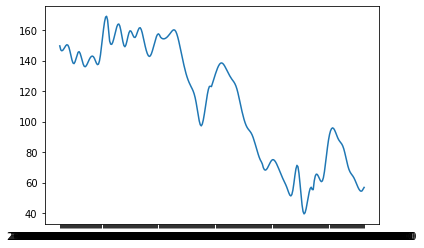

In [ ]:
import scipy.signal
#data['fs']=scipy.signal.medfilt(volume=data['fs_value'], kernel_size=7)
#plt.plot(data['time_elapsed'].iloc[:300],data['fs_value'].iloc[:300])
plt.plot(data['Time'][:300],data['CGM'][:300])

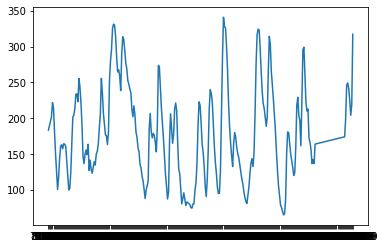

In [ ]:
import scipy.signal
#data['glucose_value']=scipy.signal.medfilt(volume=data['glucose_value'], kernel_size=5)
plt.plot(data['time_elapsed'].iloc[:300],data['glucose_value'].iloc[:300])

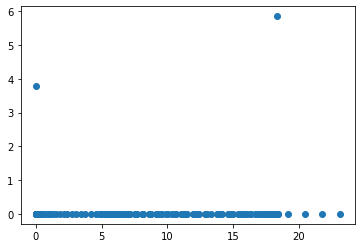

In [ ]:
plt.scatter(data['LBGI'].iloc[:300],data['bol'].iloc[:300])

In [ ]:
sum(data['bol']!=0)

48

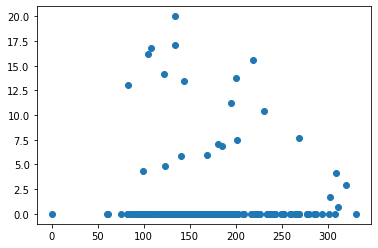

In [ ]:
plt.scatter(data['fs_value'].iloc[:300],data['bolus_value'].iloc[:300])

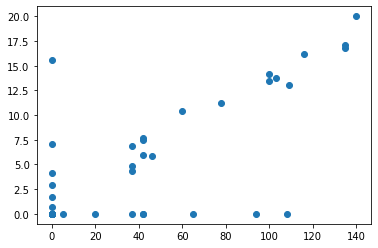

In [ ]:
plt.scatter(data['meal_carbs'].iloc[:300],data['bolus_value'].iloc[:300])

In [ ]:
import scipy.signal
#data_2['glucose_value']=scipy.signal.medfilt(volume=data_2['glucose_value'], kernel_size=5)
plt.plot(data['time_elapsed'].iloc[:300],data['bolus_value'].iloc[:300])

Error in callback <function flush_figures at 0x7fdab782f3b0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
import scipy.signal
data_3['glucose_value']=scipy.signal.medfilt(volume=data_3['glucose_value'], kernel_size=5)
plt.plot(data_3['time_elapsed'].iloc[:300],data_3['glucose_value'].iloc[:300])

NameError: ignored

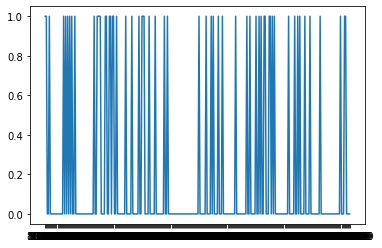

In [ ]:
plt.plot(data['time_elapsed'].iloc[:300],data['bolus_binary'].iloc[:300])

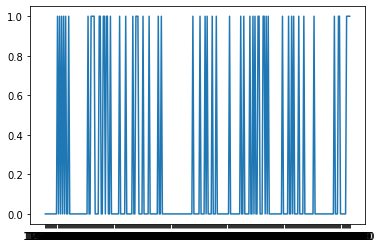

In [ ]:
plt.plot(data_3['time_elapsed'].iloc[:300],data_3['bolus_binary'].iloc[:300])

In [ ]:

sel_cols=['time_elapsed','glucose_value','meal_carbs','bolus_binary','bolus_value','fs_value','t_norm']
#sel_cols=['time_elapsed','meal_carbs','bolus_binary','bolus_value','fs_value','t_norm','exercise_intensity','exercise_duration']
#sel_cols=['BG','CHO','CGM','insulin','bas','bol','LBGI','HBGI','t_norm']
data_sub=data[sel_cols]

data_sub

,time_elapsed,glucose_value,meal_carbs,bolus_binary,bolus_value,fs_value,t_norm
20,10:00:00,214.333333,0.0,0.0,0.0,137.000000,0.416667
21,10:30:00,180.500000,0.0,0.0,0.0,122.500000,0.437500
22,11:00:00,150.666667,0.0,0.0,0.0,108.000000,0.458333
23,11:30:00,126.500000,135.0,1.0,16.8,108.166667,0.479167
24,12:00:00,100.500000,0.0,0.0,0.0,108.333333,0.500000
...,...,...,...,...,...,...,...
119,59:30:00,176.000000,0.0,0.0,0.0,142.777778,0.437500
120,60:00:00,166.333333,0.0,0.0,0.0,149.000000,0.458333
121,60:30:00,153.000000,100.0,1.0,13.4,143.818182,0.479167
122,61:00:00,188.666667,0.0,0.0,0.0,138.636364,0.500000


In [ ]:
import scipy.signal
data_sub['glucose_value']=scipy.signal.medfilt(volume=data_sub['glucose_value'], kernel_size=5)
plt.plot(data_sub['time_elapsed'],data_sub['glucose_value'])

KeyError: ignored

In [ ]:
sum(data_sub['bolus_binary']==0)

1534

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [ ]:

data

,Time,BG,CGM,CHO,insulin,LBGI,HBGI,Risk,bol,bas
0,25/05/2022 0:00,149.020000,149.673168,0.000000,0.013933,0.000000,2.755276,2.755276,0.000000,0.013933
1,25/05/2022 0:03,149.020000,147.038615,0.000000,0.013933,0.000000,2.755276,2.755276,0.000000,0.013933
2,25/05/2022 0:06,149.020000,146.459359,0.000000,0.013933,0.000000,2.755276,2.755276,0.000000,0.013933
3,25/05/2022 0:09,149.020000,146.807849,0.000000,0.013933,0.000000,2.755276,2.755276,0.000000,0.013933
4,25/05/2022 0:12,149.020000,147.731647,0.000000,0.013933,0.000000,2.755276,2.755276,0.000000,0.013933
...,...,...,...,...,...,...,...,...,...,...
958,26/05/2022 23:54,1.524240,39.000000,0.000000,0.013933,566.770247,0.000000,566.770247,0.000000,0.013933
959,26/05/2022 23:57,1.307362,39.000000,0.000000,0.013933,601.841804,0.000000,601.841804,0.000000,0.013933
960,27/05/2022 0:00,1.105864,39.000000,11.132318,0.013933,639.155693,0.000000,639.155693,0.000000,0.013933
961,27/05/2022 0:03,0.934846,39.000000,0.000000,0.941625,0.000000,0.000000,0.000000,0.927692,0.013933


In [ ]:
X=data_sub[['glucose_value','meal_carbs','t_norm']]
#X=data_sub.drop(['bol','Time'],axis=1)
#X=data_sub[['meal_carbs','fs_value','t_norm','exercise_intensity','exercise_duration']]

Y=data_sub['bolus_value']
#X=data_sub[['CGM','CHO','bas']]
#Y=data_sub[['bol']]
X

,glucose_value,meal_carbs,t_norm
20,214.333333,0.0,0.416667
21,180.500000,0.0,0.437500
22,150.666667,0.0,0.458333
23,126.500000,135.0,0.479167
24,100.500000,0.0,0.500000
...,...,...,...
119,176.000000,0.0,0.437500
120,166.333333,0.0,0.458333
121,153.000000,100.0,0.479167
122,188.666667,0.0,0.500000


In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=150)

In [ ]:
X_train

,glucose_value,meal_carbs,t_norm
92,269.000000,0.0,0.895833
55,127.166667,0.0,0.125000
60,139.166667,0.0,0.229167
26,143.666667,0.0,0.541667
100,204.166667,0.0,0.041667
...,...,...,...
34,117.333333,0.0,0.708333
70,192.500000,0.0,0.437500
45,255.333333,0.0,0.937500
78,325.666667,0.0,0.604167


In [ ]:
sum(y_test!=0)

3

In [ ]:
sum(y_train==0)/sum(y_train==1)

ZeroDivisionError: ignored

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled= scaler.fit_transform(X_train)
y_train_scaled= scaler.fit_transform(y_train.values.reshape(-1, 1)).reshape((len(y_train)))

X_test_scaled= scaler.fit_transform(X_test)
y_test_scaled= scaler.fit_transform(y_test.values.reshape(-1, 1)).reshape((len(y_test)))



In [ ]:
X_train_scaled

array([[0.40127701, 0.        , 0.        , 0.80375784],
       [0.39337697, 0.        , 0.        , 0.46555325],
       [0.37371916, 0.        , 0.        , 0.58663884],
       ...,
       [0.3179834 , 0.        , 0.        , 0.89352819],
       [0.36132428, 0.        , 0.        , 0.49060545],
       [0.99078185, 0.        , 0.        , 0.07724429]])

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,KFold,RepeatedStratifiedKFold,cross_val_score
from xgboost import XGBClassifier, XGBRegressor


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from xgboost import XGBClassifier

model = XGBRegressor()


#model = XGBClassifier(scale_pos_weight=6.147826086956521)
#model = XGBClassifier(scale_pos_weight=15.56)

parameters = {'learning_rate':np.linspace(1e-2,3e-4,4), 'objective': ['reg:squaredlogerror', 'reg:logistic', 'reg:pseudohubererror', 'reg:gamma', 'reg:tweedie'], 'max_depth':np.linspace(2,5,4,dtype=int)}

#clf = GridSearchCV(model, parameters,scoring='neg_root_mean_squared_error',cv=RepeatedStratifiedKFold())

clf = GridSearchCV(model, parameters,scoring='neg_root_mean_squared_error',cv=KFold())
clf.fit(X_train_scaled, y_train_scaled)
clf.best_params_

KeyboardInterrupt: ignored

In [ ]:
import sklearn as sk
sk.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
model = XGBRegressor(colsample_bytree=1,learning_rate=0.01,max_depth=4,n_estimators=10000,eval_metric='rmse')
#model.fit(X_train_scaled, y_train_scaled)
model.fit(X_train, y_train)

[23:22:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=4,
             n_estimators=10000)

In [ ]:
#y_pred=model.predict(X_test_scaled)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.svm import SVR
model=SVR(C=2,kernel='rbf')
model.fit(X_train_scaled, y_train_scaled)
y_pred=model.predict(X_test_scaled)

NameError: ignored

In [ ]:
y_test

89     0.0
77     0.0
55     0.0
41     0.0
45     0.0
97     0.0
56     0.0
57     0.0
110    0.0
74     0.0
46     0.0
100    0.0
92     0.0
48     0.0
82     0.0
49     0.0
88     0.0
53     0.0
95     0.0
25     0.0
63     0.0
Name: bolus_value, dtype: float64

In [ ]:
y_pred

array([5.1438808e-05, 5.1438808e-05, 5.1438808e-05, 5.1438808e-05,
       5.1438808e-05, 7.5111127e+00, 5.1438808e-05, 1.2228589e+01,
       5.1438808e-05, 5.1438808e-05, 5.1438808e-05, 5.1438808e-05,
       5.1438808e-05, 5.1438808e-05, 5.1438808e-05, 5.1438808e-05,
       5.1438808e-05, 5.1438808e-05, 4.0986710e+00, 5.1438808e-05,
       1.3400269e+01], dtype=float32)

In [ ]:
#y_pred[y_pred==2.861023e-06]=0
y_pred[y_pred<1e-01]=0

In [ ]:
y_pred

array([ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        7.5111127,  0.       , 12.228589 ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  4.098671 ,  0.       ,
       13.400269 ], dtype=float32)

In [ ]:
y_test

,bol
1558,0.0
1350,0.0
3922,0.0
504,0.0
646,0.0
...,...
2320,0.0
1312,0.0
818,0.0
2397,0.0


In [ ]:
y_test_scaled

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.63765147,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,mean_squared_error
print(mean_squared_error(y_test_scaled,y_pred))

print(mean_squared_error(y_test_scaled,y_pred,squared=False))

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,mean_squared_error
print(mean_squared_error(y_test,y_pred))

print(mean_squared_error(y_test,y_pred,squared=False))

1.402426257154209
1.184240793569538


In [ ]:
model.save_model("model.json")

In [ ]:
model_2 = XGBRegressor()
from sklearn.preprocessing import MinMaxScaler
model_2.load_model("model.json")

[12:50:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#data={'BG':39,'carbs':79.13709516, 'bas':0.754166667}
data={'BG':50,'carbs':10000, 'bas':0.9}
BG = data["BG"]
carbs=data["carbs"]
bas=data["bas"]

data_test=pd.DataFrame({'BG':[BG],'carbs':[carbs], 'bas':[bas]})


In [ ]:
data=pd.DataFrame({'BG':[100],'carbs':[50], 'insulin':[0.013933333], 'bas':[0.013933333]})
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled= scaler.fit_transform(data)
model_2.predict(data)

NameError: ignored

In [ ]:
model_test = XGBRegressor()
model_test.load_model("/content/model.json")

[12:52:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
result=model_test.predict(data_test)

In [ ]:
result

array([5.3888164], dtype=float32)

In [ ]:
xgboost.__version__

'0.90'